In [1]:
from toydata import SinGauss
from wavenet import WaveNet

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

@tf.function
def generate(model, x):
    return model(x)

def map_data(x,y):
    xn = x + tf.random.normal([RATE])
    mean = tf.reduce_mean(xn)
    max  = tf.reduce_max(tf.abs(xn))
    return (xn-mean)/max, (x-mean)/max


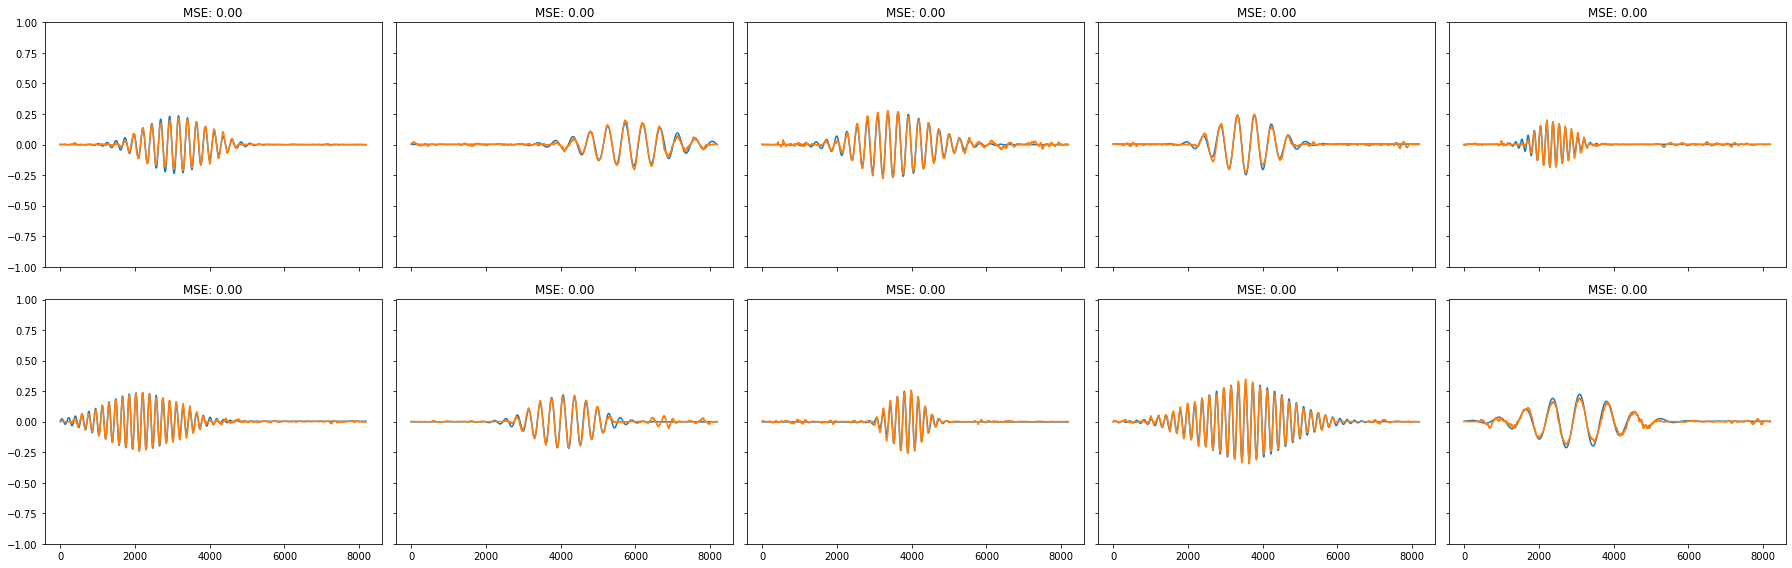

In [6]:
####
#### Generate
####
tf.compat.v1.reset_default_graph()

BATCH=1
RATE=8192
model = WaveNet()
model.build(input_shape=(1,RATE))
model.load_weights("saved.h5")

sgdata = SinGauss()
ds = tf.data.Dataset.from_generator(sgdata.gen, output_types=(tf.float32, tf.float32) )
ds = ds.map(map_data).prefetch(buffer_size=100).batch(BATCH)
it = ds.__iter__()

row, col= 2,5
fig, axs = plt.subplots(row,col, sharex=True,sharey=True, figsize=(col*5,row*4))
for i in range(row*col):
    x, y = next(it)
    ygen = generate(model, x)
    x = tf.squeeze(x)
    y = tf.squeeze(y)
    ygen = tf.squeeze(ygen)

    ax=axs[i//col, i%col]
    #ax.plot(y)
    ax.plot(y)
    ax.plot(ygen)
    ax.set_ylim([-1, 1])
    mse = sum((ygen-y)**2)/len(y)
    ax.title.set_text("MSE: {:.2f}".format(mse))
plt.tight_layout()
plt.savefig("gen.png")
